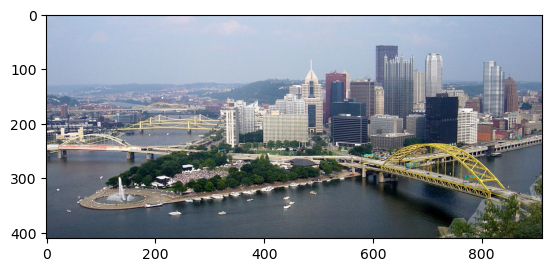

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

im = cv2.imread(os.path.relpath('../../Data/PittsburghSkyLine.jpg'))
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

plt.imshow(im)

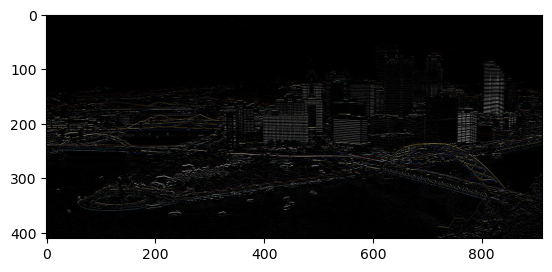

In [5]:
kernel=np.ones((2,1))
kernel[0]=-1

plt.imshow(cv2.filter2D(im,-1,kernel))


# Edges
* Sobel filter
* Canny filter

# Corners
* Harris corners
* Shi-Tomasi corners

# Blobs
* SimpleBlobDetector



Text(0.5, 1.0, 'Sobel edges')

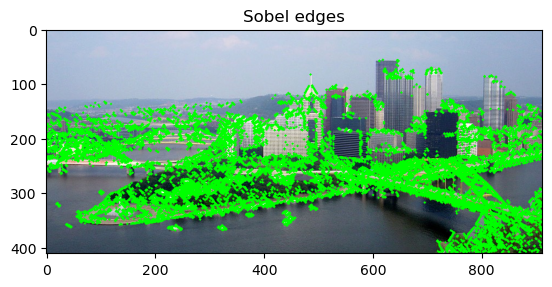

In [38]:
# Sobel edges

im_sobel = im.copy()
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
gray_image = np.float32(gray_image) 

sobel = cv2.Sobel(gray_image,ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# take the top terms as the edges of interest
corners = np.argwhere(sobel > 0.1 * sobel.max())
for x,y in corners: 
    cv2.circle(im_sobel, (y, x), 2, (0, 255, 0), -1)

plt.imshow(im_sobel); plt.title('Sobel edges')

Text(0.5, 1.0, 'Canny edges')

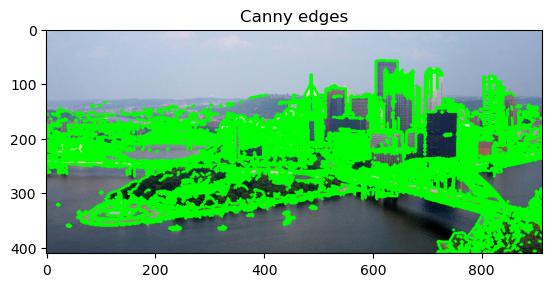

In [37]:
# Canny edges

im_canny = im.copy()
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

canny = cv2.Canny(gray_image,150,250)

# take the top terms as the edges of interest
corners = np.argwhere(canny > 0.95 * canny.max())
for x,y in corners: 
    cv2.circle(im_canny, (y, x), 2, (0, 255, 0), -1)
 
plt.imshow(im_canny); plt.title('Canny edges')

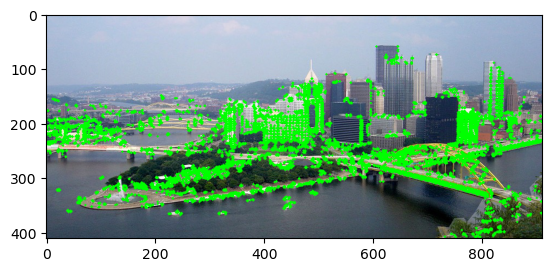

In [35]:
# Harris corners

im_harris = im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
gray_image = np.float32(gray_image) 

# Applying the function 
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)  

corners = np.argwhere(dst > 0.01 * dst.max())
for x,y in corners: 
    cv2.circle(im_harris, (y, x), 2, (0, 255, 0), -1)
 
plt.imshow(im_harris); plt.title("Harris Corners") 

Text(0.5, 1.0, 'Shi-Tomasi corners')

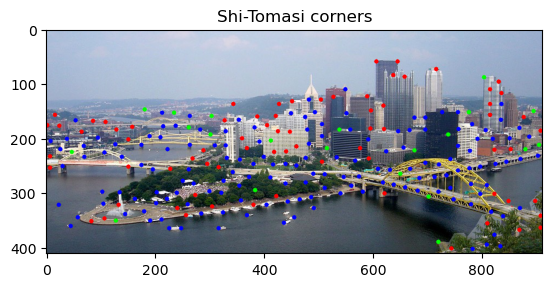

In [16]:
im_STC = im.copy()
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
gray_image = np.float32(gray_image) 

corners = cv2.goodFeaturesToTrack( 
    gray_image, maxCorners=250, qualityLevel=0.02, minDistance=20) 
corners2 = cv2.goodFeaturesToTrack( 
    gray_image, maxCorners=250, qualityLevel=0.1, minDistance=20) 
corners3 = cv2.goodFeaturesToTrack( 
    gray_image, maxCorners=250, qualityLevel=0.2, minDistance=20) 

corners = np.float32(corners) 
corners2 = np.float32(corners2) 
corners3 = np.float32(corners3) 
  
for item in corners: 
    x, y = item[0] 
    x = int(x) 
    y = int(y) 
    cv2.circle(im_STC, (x, y), 4, (0, 255, 0), -1)
for item in corners2: 
    x, y = item[0] 
    x = int(x) 
    y = int(y) 
    cv2.circle(im_STC, (x, y), 4, (255,0, 0), -1)
for item in corners3: 
    x, y = item[0] 
    x = int(x) 
    y = int(y) 
    cv2.circle(im_STC, (x, y), 4, (0,0,255), -1)
plt.imshow(im_STC); plt.title('Shi-Tomasi corners') 

Text(0.5, 1.0, 'Blob')

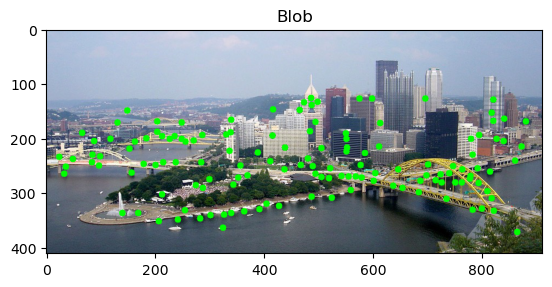

In [90]:
im_blob = im.copy()
gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 50
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(im_blob)

for item in keypoints: 
    x, y = item.pt
    x = int(x) 
    y = int(y) 
    cv2.circle(im_blob, (x, y), 6, (0, 255, 0), -1)


plt.imshow(im_blob); plt.title('Blob') 

Text(0.5, 1.0, 'Blob keypoints')

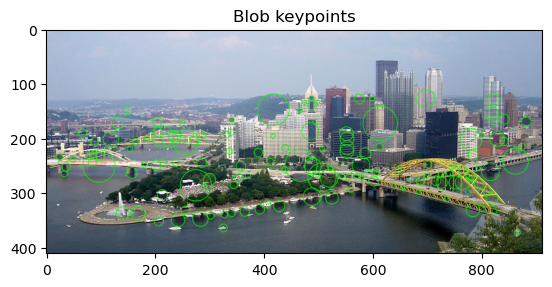

In [91]:
im_blob2 = im.copy()
im_blob2 = cv2.drawKeypoints(im_blob2, keypoints, None, color=( 
    0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(im_blob2); plt.title('Blob keypoints') 

Text(0.5, 1.0, 'SIFT')

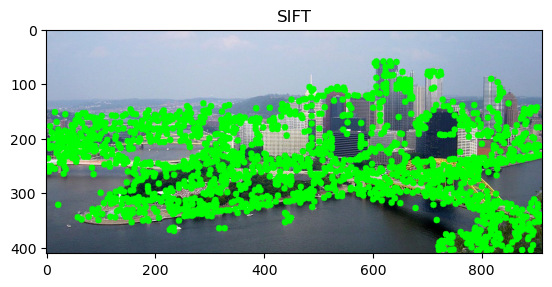

In [92]:
im_SIFT=im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

sift = cv2.xfeatures2d.SIFT_create() 
keypoints, des = sift.detectAndCompute(gray_image, None) 


for item in keypoints: 
    x, y = item.pt
    x = int(x) 
    y = int(y) 
    cv2.circle(im_SIFT, (x, y), 6, (0, 255, 0), -1)


plt.imshow(im_SIFT); plt.title('SIFT') 

Text(0.5, 1.0, 'SIFT Keypoints')

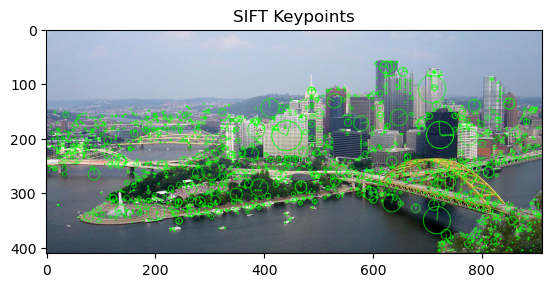

In [93]:
im_SIFT2=im.copy()

# Applying the function 
im_SIFT2 = cv2.drawKeypoints(im_SIFT2, keypoints, None, color=( 
    0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_SIFT2); plt.title('SIFT Keypoints') 


Text(0.5, 1.0, 'FAST')

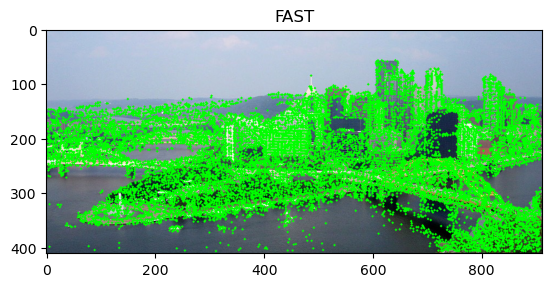

In [98]:
im_FAST=im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

# Applying the function 
fast = cv2.FastFeatureDetector_create() 
fast.setNonmaxSuppression(True) 
  
# Drawing the keypoints 
keypoints = fast.detect(gray_image, None) 


for item in keypoints: 
    x, y = item.pt
    x = int(x) 
    y = int(y) 
    cv2.circle(im_FAST, (x, y), 2, (0, 255, 0), -1)


plt.imshow(im_FAST); plt.title('FAST') 

Text(0.5, 1.0, 'FAST keypoints')

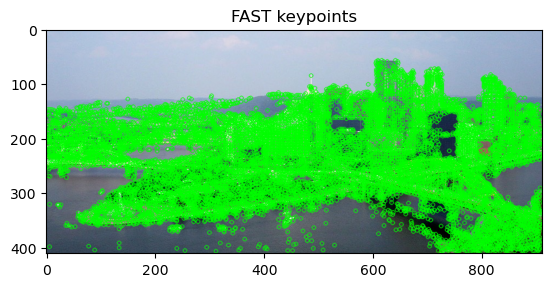

In [97]:
im_FAST2=im.copy()
im_FAST2 = cv2.drawKeypoints(im_FAST2, keypoints, None, color=(0, 255, 0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(im_FAST2); plt.title('FAST keypoints') 

Text(0.5, 1.0, 'ORB')

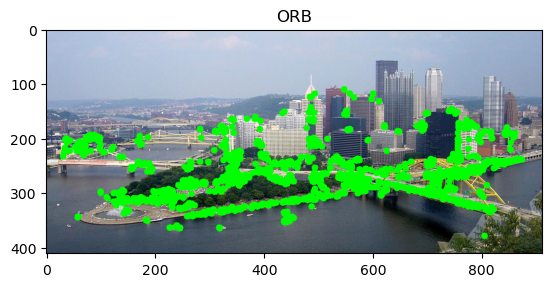

In [99]:
im_ORB=im.copy()

gray_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 

# Applying the function 
orb = cv2.ORB_create(nfeatures=2000) 
keypoints, des = orb.detectAndCompute(gray_image, None) 


for item in keypoints: 
    x, y = item.pt
    x = int(x) 
    y = int(y) 
    cv2.circle(im_ORB, (x, y), 6, (0, 255, 0), -1)


plt.imshow(im_ORB); plt.title('ORB') 


Text(0.5, 1.0, 'ORB keypoints')

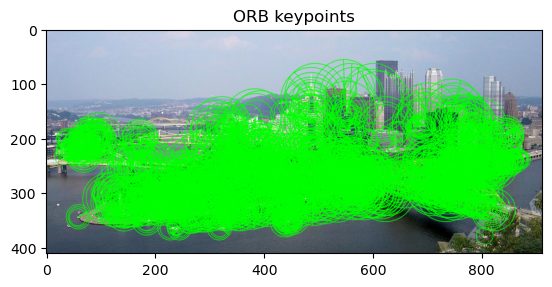

In [100]:

im_ORB2=im.copy()  
# Drawing the keypoints 
im_ORB2 = cv2.drawKeypoints(im_ORB2, keypoints, None, color=(0, 255, 0),
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  

plt.imshow(im_ORB2); plt.title("ORB keypoints")